In [348]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [349]:
vid_folder = '/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/Cropped_vids'

vids_gc1 = []
vids_ngc1 = []

for file in os.listdir(vid_folder):
    if file.endswith('.mp4'):
        x = file.split('DLC')[0]
        if x.endswith('downsampled'):
            vids_ngc1.append(file)
        else:
            vids_gc1.append(file)

In [350]:
vids_gc = sorted(vids_gc1)
vids_ngc = sorted(vids_ngc1)

In [351]:
primary_name = []
for i in range(len(vids_gc)):
    x = vids_gc[i].split('DLC')[0]
    y = vids_ngc[i].split('DLC')[0]
    print(x)
    print(y)
    if y.endswith('downsampled'):
        y1 = y[:-len('downsampled')]
    if x.endswith('_GC'):
        x1 = x[:-len('_GC')]
    if x1==y1:
        print("yay")
        primary_name.append(x1)
    else:
        print("nay")

AAACrpoutput_videoken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
yay
AAACrpoutput_videoken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
yay
AAACrpoutput_videoken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
yay
AAACrpoutput_videoken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
yay
AAACrpoutput_videoken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GC
AAACrpoutput_videoken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled
yay
AAACrpoutput_videonil_20210614

In [352]:
primary_name

['AAACrpoutput_videoken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videoken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videoken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videoken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videoken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videonil_20210614_XBI19',
 'AAACrpoutput_videovin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videovin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videovin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera',
 'AAACrpoutput_videovin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera',
 'AAACrpoutput_videovin_20210604_0907_XBI19_reversal_learning_foraging_SC3_DCS_front_camera']

In [353]:
gc_stats = []
for file in vids_gc:
    origin = os.path.join(vid_folder, file)
    cur_vid = cv2.VideoCapture(origin)
    frames = cur_vid.get(cv2.CAP_PROP_FRAME_COUNT)
    gc_stats.append(frames)
    # print(file)
    
# print('')
ngc_stats = []
for file in vids_ngc:
    origin = os.path.join(vid_folder, file)
    cur_vid = cv2.VideoCapture(origin)
    frames = cur_vid.get(cv2.CAP_PROP_FRAME_COUNT)
    ngc_stats.append(frames)
    # print(file)

In [354]:
diff = []
for i in range(len(gc_stats)):
    d = gc_stats[i] - ngc_stats[i]
    diff.append(d)

In [355]:
stats_list = np.array([primary_name, gc_stats, ngc_stats, diff]).T
stats = pd.DataFrame(stats_list)
stats.columns = ('File Name', 'With Gamma Correction', 'Sans Gamma Correction', 'Difference in no. of Frames')
stats

,File Name,With Gamma Correction,Sans Gamma Correction,Difference in no. of Frames
0,AAACrpoutput_videoken_20210503_0911_XBI19_reve...,4519.0,3280.0,1239.0
1,AAACrpoutput_videoken_20210504_1236_XBI19_reve...,11948.0,8633.0,3315.0
2,AAACrpoutput_videoken_20210505_0939_XBI19_reve...,1918.0,1575.0,343.0
3,AAACrpoutput_videoken_20210506_XBI19_reversal_...,12020.0,9549.0,2471.0
4,AAACrpoutput_videoken_20210507_1032_XBI19_reve...,21774.0,15071.0,6703.0
5,AAACrpoutput_videonil_20210614_XBI19,1057.0,513.0,544.0
6,AAACrpoutput_videovin_20210525_0844_XBI19_reve...,4920.0,3157.0,1763.0
7,AAACrpoutput_videovin_20210526_1022_XBI19_reve...,27882.0,20761.0,7121.0
8,AAACrpoutput_videovin_20210527_1010_XBI19_reve...,14545.0,3183.0,11362.0
9,AAACrpoutput_videovin_20210528_1002_XBI19_reve...,7173.0,7052.0,121.0


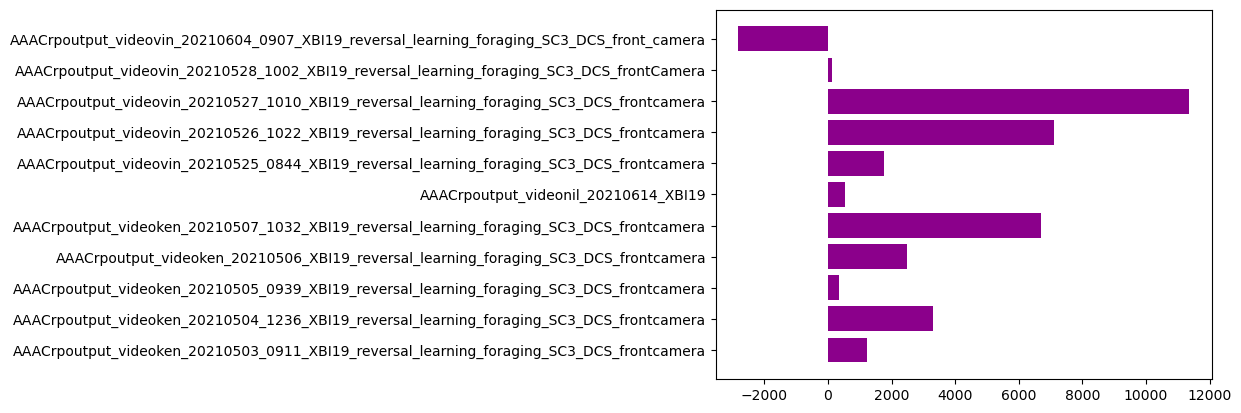

In [356]:
plt.barh(primary_name, diff, color = 'DarkMagenta')
plt.show()

In [357]:
fl_name = '/home/yramakrishna/DeepLabCut/conda-environments/Codes/Frame_Ids.csv'
f = pd.read_csv(fl_name, header = [0])
f

,File_name,GC_only,NGC_only,Both
0,ken_20210503_0911_XBI19_reversal_learning_fora...,"[299, 300, 301, 302, 303, 304, 306, 307, 925, ...","[31877, 32403, 33129, 33726, 33727, 34765, 348...","[308, 309, 310, 312, 313, 314, 315, 316, 317, ..."
1,ken_20210504_1236_XBI19_reversal_learning_fora...,"[270, 271, 324, 325, 326, 327, 328, 329, 330, ...","[2668, 2669, 2781, 4080, 36956, 37850, 39157, ...","[2670, 2713, 2714, 2715, 2725, 2726, 2727, 272..."
2,ken_20210505_0939_XBI19_reversal_learning_fora...,"[7085, 7086, 7087, 7088, 7089, 7090, 7091, 709...","[17932, 17947, 17977, 22289, 32048, 32051, 321...","[5303, 5304, 7143, 7144, 7171, 7177, 7180, 718..."
3,ken_20210506_XBI19_reversal_learning_foraging_...,"[51, 52, 56, 57, 58, 59, 60, 61, 62, 63, 64, 6...","[5755, 18751, 18758, 18759, 18857, 18858, 1914...","[441, 442, 443, 444, 445, 1018, 1045, 1046, 11..."
4,ken_20210507_1032_XBI19_reversal_learning_fora...,"[1099, 1100, 1114, 1115, 1116, 1119, 1120, 112...","[2688, 2689, 2692, 2694, 4821, 4822, 4862, 486...","[1117, 1118, 1122, 1123, 1124, 1125, 1126, 112..."
5,nil_20210614_XBI19,"[1811, 1812, 1813, 1814, 1825, 1827, 1828, 182...","[1858, 2189, 2194, 2195, 2211, 2212, 2213, 221...","[1815, 1816, 1817, 1818, 1819, 1820, 1821, 182..."
6,vin_20210525_0844_XBI19_reversal_learning_fora...,"[248, 256, 257, 267, 268, 363, 537, 539, 550, ...","[723, 4062, 5073, 5074, 5346, 5778, 5779, 5793...","[249, 250, 251, 252, 253, 263, 264, 265, 266, ..."
7,vin_20210526_1022_XBI19_reversal_learning_fora...,"[523, 524, 525, 526, 527, 528, 538, 539, 540, ...","[890, 891, 892, 1057, 1058, 1059, 1066, 1067, ...","[529, 530, 531, 532, 533, 534, 535, 536, 537, ..."
8,vin_20210527_1010_XBI19_reversal_learning_fora...,"[524, 525, 569, 570, 571, 572, 573, 574, 575, ...","[8643, 8644, 8645, 30325, 30326, 30327, 33639,...","[634, 635, 636, 1010, 1011, 2853, 2854, 2855, ..."
9,vin_20210528_1002_XBI19_reversal_learning_fora...,"[406, 407, 408, 409, 419, 420, 427, 428, 433, ...","[415, 519, 520, 548, 549, 858, 859, 1188, 1189...","[395, 396, 397, 398, 399, 400, 401, 402, 410, ..."


In [203]:
i = f.File_name[1]
j = f.loc[f.File_name==i].loc[1].loc['framesIDS']#.loc[0]
k = j.strip('][').split(', ')
l = [int(i) for i in k]
l

[529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 543,
 544,
 545,
 546,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 752,
 753,
 754,
 755,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 785,
 786,
 787,
 788,
 789,
 790,
 791,
 792,
 793,
 794,
 795,
 796,
 797,
 798,
 799,
 800,
 801,
 802,
 803,
 804,
 805,
 806,
 807,
 808,
 809,
 810,
 811,
 812,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 831,
 832,
 833,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 864,
 865,
 866,
 867,
 868,
 869,
 870,
 878,
 879,
 880,
 881,
 882,
 883,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959

In [309]:
gc_id1 = []; ngc_id1 = []
for i in f.File_name:
    k = f.loc[f.File_name==i].framesIDS.values[0]
    l = k.strip('][').split(', ')
    nd = [int(i) for i in l]
    x = os.path.basename(i).split('DLC')[0]
    if x.endswith('downsampled'):
        x1 = x[:-len('downsampled')]
        ngc_id1.append([x1, nd])
    elif x.endswith('_GC'):
        x1 = x[:-len('_GC')]
        gc_id1.append([x1, nd])

In [310]:
gc_id = sorted(gc_id1)
ngc_id = sorted(ngc_id1)

In [311]:
# d1 = []; d2 = []; d3 = []
diffs = []
for i in range(len(gc_id)):
    agc = gc_id[i][1]
    bngc = ngc_id[i][1]
    d1 = sorted(list(set(agc).difference(bngc)))
    d2 = sorted(list(set(bngc).difference(agc)))
    d3 = sorted(list(set(agc).intersection(bngc)))
    # d1.append(sorted(list(set(agc).difference(bngc))))
    # d2.append(sorted(list(set(bngc).difference(agc))))
    # d3.append(sorted(list(set(agc).intersection(bngc))))
    diffs.append([primary_name[i].split('AAACrpoutput_video')[1], d1, d2, d3])

# da1 = np.array(d1)
# da2 = np.array(d2)
# da3 = np.array(d3)

In [312]:
diffs[1][0]

'ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera'

In [313]:
dfdiff1 = pd.DataFrame(diffs, columns = ['File_name', 'GC_only', 'NGC_only', 'Both'])
dfdiff = dfdiff1.set_index('File_name')

In [342]:
dfdiff

,GC_only,NGC_only,Both
File_name,,,
ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[299, 300, 301, 302, 303, 304, 306, 307, 925, ...","[31877, 32403, 33129, 33726, 33727, 34765, 348...","[308, 309, 310, 312, 313, 314, 315, 316, 317, ..."
ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[270, 271, 324, 325, 326, 327, 328, 329, 330, ...","[2668, 2669, 2781, 4080, 36956, 37850, 39157, ...","[2670, 2713, 2714, 2715, 2725, 2726, 2727, 272..."
ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[7085, 7086, 7087, 7088, 7089, 7090, 7091, 709...","[17932, 17947, 17977, 22289, 32048, 32051, 321...","[5303, 5304, 7143, 7144, 7171, 7177, 7180, 718..."
ken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[51, 52, 56, 57, 58, 59, 60, 61, 62, 63, 64, 6...","[5755, 18751, 18758, 18759, 18857, 18858, 1914...","[441, 442, 443, 444, 445, 1018, 1045, 1046, 11..."
ken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[1099, 1100, 1114, 1115, 1116, 1119, 1120, 112...","[2688, 2689, 2692, 2694, 4821, 4822, 4862, 486...","[1117, 1118, 1122, 1123, 1124, 1125, 1126, 112..."
nil_20210614_XBI19,"[1811, 1812, 1813, 1814, 1825, 1827, 1828, 182...","[1858, 2189, 2194, 2195, 2211, 2212, 2213, 221...","[1815, 1816, 1817, 1818, 1819, 1820, 1821, 182..."
vin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[248, 256, 257, 267, 268, 363, 537, 539, 550, ...","[723, 4062, 5073, 5074, 5346, 5778, 5779, 5793...","[249, 250, 251, 252, 253, 263, 264, 265, 266, ..."
vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[523, 524, 525, 526, 527, 528, 538, 539, 540, ...","[890, 891, 892, 1057, 1058, 1059, 1066, 1067, ...","[529, 530, 531, 532, 533, 534, 535, 536, 537, ..."
vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[524, 525, 569, 570, 571, 572, 573, 574, 575, ...","[8643, 8644, 8645, 30325, 30326, 30327, 33639,...","[634, 635, 636, 1010, 1011, 2853, 2854, 2855, ..."


In [315]:
allx = dfdiff.loc['ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera'].loc['GC_only']#.File_name[1]
# len(dfdiff.GC_only[1])
print(len(allx))
allx.index(min(allx))

1317


0

In [316]:
# def crop_it(feed):
#     # feed = ['/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos/vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered.h5',
#     #         '/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos/vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4',
#     #         'DLC_resnet50_DLCApr12shuffle1_1030000']
#     fl_pth, vid_pth, x = feed
#     # deeplabcut.analyze_videos(config_path, 'CropGr.mp4', save_as_csv=True, dynamic=(True,.6,30))
#     print("Starting Cropping")

#     # Define the names of the facial features that you want to extract frames for
#     # feature_names = ['RightEye_Pupil','LeftEye_Pupil', 'NostrilsTop_Centre', 'OutlineTop_Mid']

#     # Load tracking results generated by DeepLabCut
#     tracking_data = pd.read_hdf(fl_pth)
#     # x = tracking_data['DLC_resnet50_DLCApr12shuffle1_1030000'][feature_names]
#     # x.isna().any()

#     necessary_points = tracking_data['DLC_resnet50_DLCApr12shuffle1_1030000'][feature_names]
#     # Define the threshold for the confidence score of the facial features
#     confidence_threshold = 0.9

#     # Load the input video
#     cap = cv2.VideoCapture(vid_pth)

#     tot_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

#     # initializing the frame id list
#     frame_ids = []

#     # Loop through the video frames and extract frames with facial features
#     frame_number = 0
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
#     while (cap.isOpened()):
#         ret, frame = cap.read()
#         if ret == True:
#             # Get the tracking data for the current frame
#             frame_data = necessary_points.loc[frame_number]
#             # print(frame_data)

#             # Check if the desired facial features are present in the frame
#             feature_present = False
#             check = 0            
#             for feature_name in feature_names:
#                 if feature_name in frame_data and frame_data.loc[feature_name].loc['likelihood'] > confidence_threshold:
#                     check += 1
#             if check==4:
#                 feature_present = True

#             # If the desired facial features are present, save the frame to the output video
#             if feature_present: #check==4
#                 frame_ids.append(frame_number)

#             # Display the output
#             #cv2.imshow('output', frame)
#             if cv2.waitKey(1) & 0xFF == ord('q'):
#                 break
#             print(round(frame_number/tot_frame*100, 2), end = '\r')
#             # Increment the frame number
#             frame_number += 1
#         else:
#             break
#     print("Done")
#     # Release resources
#     cap.release()
#     # out.release()
#     cv2.destroyAllWindows()
#     return frame_ids

In [332]:
def crop_it(feed):
    
    fl_pth, vid_pth, ids, both = feed
    # deeplabcut.analyze_videos(config_path, 'CropGr.mp4', save_as_csv=True, dynamic=(True,.6,30))
    print("Starting Cropping")

    # Load tracking results generated by DeepLabCut
    tracking_data = pd.read_hdf(fl_pth)

    # Define the threshold for the confidence score of the facial features
    confidence_threshold = 0.9
    
    # Load the input video
    cap = cv2.VideoCapture(vid_pth)
    
    tot_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the output video writer
    bn = os.path.basename(vid_pth).split('.')[0]
    targ_fold2 = ''
    x = os.path.basename(vid_pth).split('DLC')[0]
    if x.endswith('downsampled'):
        if both:
            targ_fold = 'FramesBoth'
        else:
            targ_fold = 'FramesNGC'
    elif x.endswith('_GC'):
        targ_fold = 'FramesGC'
    
    out_file = os.path.join(os.getcwd(),targ_fold, 'Frame_select_' + bn + '.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(out_file, fourcc, 30, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
    print("Output file created - ", out_file)
    
    startid = min(ids)
    stopid = max(ids)
    # print(startid, stopid)
    # Loop through the video frames and extract frames with facial features
    frame_number = startid
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    while ((cap.isOpened())and frame_number<=stopid):
        ret, frame = cap.read()
        if ret == True:
            if frame_number in ids:
                cv2.imshow('output', frame)
                out.write(frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
            print(round(frame_number/tot_frame*100, 2), end = '\r')
            # Increment the frame number
            frame_number += 1
        else:
            break
    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print("Done")

In [333]:
project_name = 'DLC'
your_name = 'VK'
os.chdir('/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids')
h5files = []
vid_to_crop = []
# today = str(date.today())
today = "2023-04-12"
proj_fold = project_name+'-'+your_name+'-'+today
# print(today)
target = os.path.join(os.getcwd(),proj_fold,'videos')
print(target)
for file in os.listdir(target):
    if file.endswith("filtered.h5"):
        h5files.append(os.path.join(target,file))
for file in os.listdir(target):   
    if file.endswith("labeled.mp4"):
        vid_to_crop.append(os.path.join(target,file))
        
# print(h5files, vid_to_crop)
# videotype = os.path.splitext(file)[-1].lstrip('.')

/home/yramakrishna/DeepLabCut/conda-environments/Codes/All_vids/DLC-VK-2023-04-12/videos


In [334]:
os.chdir('/home/yramakrishna/DeepLabCut/conda-environments/Codes')
os.getcwd()

'/home/yramakrishna/DeepLabCut/conda-environments/Codes'

In [335]:
if not os.path.exists('Frames_of_interest'):
        os.makedirs('Frames_of_interest')
os.chdir('Frames_of_interest')

In [336]:
if not os.path.exists('FramesGC'):
        os.makedirs('FramesGC')
if not os.path.exists('FramesNGC'):
        os.makedirs('FramesNGC')
if not os.path.exists('FramesBoth'):
        os.makedirs('FramesBoth')

In [337]:
crop_source = []
if len(h5files)==len(vid_to_crop):
    for i in h5files:
        found = ''
        for j in vid_to_crop:
            x = os.path.splitext(i)[0].rstrip('_filtered.h5')
            y = os.path.splitext(j)[0].rstrip('filtered_labeled.mp4')
            if x==y:
                found = j
        k = os.path.basename(i)
        # l = 'DLC' + k.split('DLC')[1] + 'DLC' + k.split('DLC')[2].rstrip('_filtered.h5')
        # # print(l)
        # print(i)
        # print(found)
        # # print(k)
        # print(l)
        # # print('')
        fl = os.path.basename(found).split('DLC')[0]
        if fl.endswith('downsampled'):
            flx = fl[:-len('downsampled')]
            lst = dfdiff.loc[flx].loc['NGC_only']
        elif fl.endswith('_GC'):
            flx = fl[:-len('_GC')]
            lst = dfdiff.loc[flx].loc['GC_only']
        crop_source.append([i, found, lst, False])
# c_s = np.array(crop_source)


In [338]:
if len(h5files)==len(vid_to_crop):
    for i in h5files:
        found = ''
        for j in vid_to_crop:
            x = os.path.splitext(i)[0].rstrip('_filtered.h5')
            y = os.path.splitext(j)[0].rstrip('filtered_labeled.mp4')
            if x==y:
                found = j
        k = os.path.basename(i)
        # l = 'DLC' + k.split('DLC')[1] + 'DLC' + k.split('DLC')[2].rstrip('_filtered.h5')
        # # print(l)
        # print(i)
        # print(found)
        # # print(k)
        # print(l)
        # # print('')
        fl = os.path.basename(found).split('DLC')[0]
        if fl.endswith('downsampled'):
            flx = fl[:-len('downsampled')]
            lst = dfdiff.loc[flx].loc['Both']
        else:
            continue
        crop_source.append([i, found, lst, True])

In [339]:
os.path.basename(c_s[1][1]).split('DLC')[0]

'vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampled'

In [340]:
c_s = crop_source
print(len(c_s))

33


In [341]:
all_frames = []
# crop_it(c_s[0])
for i in c_s:
    x = crop_it(i)
    all_frames.append([i[1],x])

Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4
Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done3
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done1
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_vin_20210604_0907_XBI19_reversal_learning_foraging_SC3_DCS_front_cameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done7
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_ken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done2
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_ken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done7
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done4
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_ken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done7
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_nil_20210614_XBI19_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done5
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done7
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done8
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_ken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_nil_20210614_XBI19downsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done2
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210604_0907_XBI19_reversal_learning_foraging_SC3_DCS_front_camera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done6
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done2
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done6
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_vin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done6
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesNGC/Frame_select_ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done1
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done6
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done5
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_vin_20210604_0907_XBI19_reversal_learning_foraging_SC3_DCS_front_cameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done7
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_ken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done5
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done4
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_ken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done5
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_nil_20210614_XBI19downsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done2
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done9
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_vin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done1
Starting Cropping
Output file created -  /home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesBoth/Frame_select_ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcameradownsampledDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4


QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread

Done6


In [330]:
# cap = cv2.VideoCapture('/home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/FramesGC/Frame_select_vin_20210528_1002_XBI19_reversal_learning_foraging_SC3_DCS_frontCamera_GCDLC_resnet50_DLCApr12shuffle1_1030000_filtered_labeled.mp4')

# tot_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# print(tot_frame)dell german keyboard
# print(len(c_s[0][2]))

543
543


In [359]:
fl_name2 = '/home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/Frame_Differences.csv'

In [362]:
# open the file in the write mode
f = open(fl_name2, 'w')

# write a row to the csv file
dfdiff.to_csv(fl_name2)

In [364]:
fl_name2 = '/home/yramakrishna/DeepLabCut/conda-environments/Codes/Frames_of_interest/Frame_Differences.csv'
f = pd.read_csv(fl_name2)
f2 = f.set_index('File_name')
f2

,GC_only,NGC_only,Both
File_name,,,
ken_20210503_0911_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[299, 300, 301, 302, 303, 304, 306, 307, 925, ...","[31877, 32403, 33129, 33726, 33727, 34765, 348...","[308, 309, 310, 312, 313, 314, 315, 316, 317, ..."
ken_20210504_1236_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[270, 271, 324, 325, 326, 327, 328, 329, 330, ...","[2668, 2669, 2781, 4080, 36956, 37850, 39157, ...","[2670, 2713, 2714, 2715, 2725, 2726, 2727, 272..."
ken_20210505_0939_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[7085, 7086, 7087, 7088, 7089, 7090, 7091, 709...","[17932, 17947, 17977, 22289, 32048, 32051, 321...","[5303, 5304, 7143, 7144, 7171, 7177, 7180, 718..."
ken_20210506_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[51, 52, 56, 57, 58, 59, 60, 61, 62, 63, 64, 6...","[5755, 18751, 18758, 18759, 18857, 18858, 1914...","[441, 442, 443, 444, 445, 1018, 1045, 1046, 11..."
ken_20210507_1032_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[1099, 1100, 1114, 1115, 1116, 1119, 1120, 112...","[2688, 2689, 2692, 2694, 4821, 4822, 4862, 486...","[1117, 1118, 1122, 1123, 1124, 1125, 1126, 112..."
nil_20210614_XBI19,"[1811, 1812, 1813, 1814, 1825, 1827, 1828, 182...","[1858, 2189, 2194, 2195, 2211, 2212, 2213, 221...","[1815, 1816, 1817, 1818, 1819, 1820, 1821, 182..."
vin_20210525_0844_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[248, 256, 257, 267, 268, 363, 537, 539, 550, ...","[723, 4062, 5073, 5074, 5346, 5778, 5779, 5793...","[249, 250, 251, 252, 253, 263, 264, 265, 266, ..."
vin_20210526_1022_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[523, 524, 525, 526, 527, 528, 538, 539, 540, ...","[890, 891, 892, 1057, 1058, 1059, 1066, 1067, ...","[529, 530, 531, 532, 533, 534, 535, 536, 537, ..."
vin_20210527_1010_XBI19_reversal_learning_foraging_SC3_DCS_frontcamera,"[524, 525, 569, 570, 571, 572, 573, 574, 575, ...","[8643, 8644, 8645, 30325, 30326, 30327, 33639,...","[634, 635, 636, 1010, 1011, 2853, 2854, 2855, ..."


In [369]:
os.getcwd()

'/home/yramakrishna/DeepLabCut/conda-environments/Codes'

In [ ]:
os.chdir('/home/yramakrishna/DeepLabCut/conda-environments/Codes')


In [368]:
import cv2
import numpy as np
  
# Read First Image
img1 = cv2.imread('img05.png')
  
# Read Second Image
img2 = cv2.imread('img05.png')

# concatenate image Horizontally
Hori = np.concatenate((img1, img2), axis=1)
  
# concatenate image Vertically
Verti = np.concatenate((img1, img2), axis=0)
  
cv2.imshow('HORIZONTAL', Hori)
cv2.imshow('VERTICAL', Verti)
  
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread (0x71a2ea0).
Cannot move to target thread (0x7e60b40)

QObject::moveToThread: Current thread (0x7e60b40) is not the object's thread